#### Library Import

In [1]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

#### File load

In [9]:
# Can't run this from atom, not enough memory...
trajFile = '/home/adria/mounts/oliba/data/profasi/asyn/pre/asyn100k/frames/traj100k.xtc'
traj = md.load(trajFile,top='/home/adria/mounts/oliba/data/profasi/asyn/pre/asyn100k/frames/frame_0000000.pdb')

MemoryError: Unable to allocate array with shape (100000, 2016, 3) and data type float32

#### Calculate secondary structure components

mdtraj.compute_dssp(traj, simplified=True) assigns each residue a structural value. If simplified = False:


‘H’ : Alpha helix

‘B’ : Residue in isolated beta-bridge

‘E’ : Extended strand, participates in beta ladder

‘G’ : 3-helix (3/10 helix)

‘I’ : 5 helix (pi helix)

‘T’ : hydrogen bonded turn

‘S’ : bend

‘ ‘ : Loops and irregular elements

If simplified = True:

‘H’ : Helix. Either of the ‘H’, ‘G’, or ‘I’ codes.

‘E’ : Strand. Either of the ‘E’, or ‘B’ codes.

‘C’ : Coil. Either of the ‘T’, ‘S’ or ‘ ‘ codes.

returns assignmentsnp.ndarray, shape=(n_frames, n_residues), dtype=S1

In [ ]:
data = np.load('ss.npy')

In [22]:
frames = data.shape[0]
residues = data.shape[1]
atot,btot,ctot = [],[],[]
for res in range(data.shape[1]):
    a,b,c = 0,0,0
    for frame in data[:,res]:
        if frame == 'C':
            c += 1
        if frame == 'E':
            b += 1
        if frame == 'H':
            a += 1
    ctot.append(c/frames)
    btot.append(b/frames)
    atot.append(a/frames)

(100000, 140)


#### Reality Check

In [29]:
tot = np.array([atot,btot,ctot])
print(np.sum(tot,axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


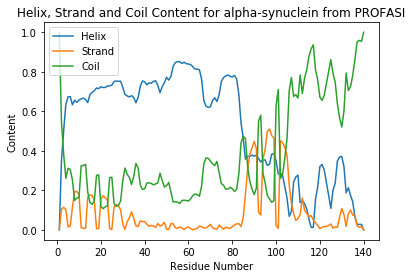

In [24]:
helixContent = atot
betaContent  = btot
coilContent  = ctot

residuesarr = np.linspace(1,residues, residues, endpoint=True)

plt.xlabel("Residue Number")
plt.ylabel("Content")
plt.title("Helix, Strand and Coil Content for alpha-synuclein from PROFASI")
plt.plot(residuesarr, helixContent, label="Helix")
plt.plot(residuesarr, betaContent, label="Strand")
plt.plot(residuesarr, coilContent, label="Coil")
plt.legend();